<a href="https://colab.research.google.com/github/UXDynamicSolution/datamining_public/blob/main/ejemplo_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Ejemplo Machine Learning, conversor de temperatura en base a datos de aprendizaje



Epoch 0: Loss = 0.086651
Epoch 200: Loss = 0.000004
Epoch 400: Loss = 0.000000
Epoch 600: Loss = 0.000000
Epoch 800: Loss = 0.000000
Epoch 1000: Loss = 0.000000
Epoch 1200: Loss = 0.000000
Epoch 1400: Loss = 0.000000
Epoch 1600: Loss = 0.000000
Epoch 1800: Loss = 0.000000


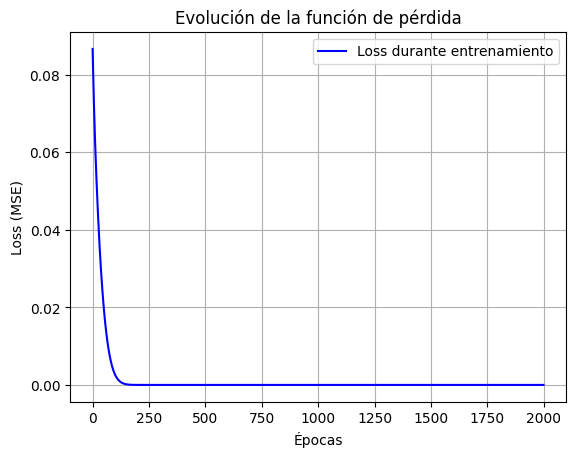

Predicción: 2°C ≈ 35.60°F


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Datos originales (Celsius → Fahrenheit)
x_raw = torch.tensor([[-40.0], [0.0], [10.0], [20.0], [30.0], [40.0], [100.0]], dtype=torch.float32)
y_raw = torch.tensor([[-40.0], [32.0], [50.0], [68.0], [86.0], [104.0], [212.0]], dtype=torch.float32)

# Normalización (min-max scaling)
x_min, x_max = x_raw.min(), x_raw.max()
y_min, y_max = y_raw.min(), y_raw.max()

x_train = (x_raw - x_min) / (x_max - x_min)
y_train = (y_raw - y_min) / (y_max - y_min)

# Definir el modelo de regresión lineal
class CelsiusToFahrenheit(nn.Module):
    def __init__(self):
        super(CelsiusToFahrenheit, self).__init__()
        self.linear = nn.Linear(1, 1)  # Capa lineal con 1 entrada y 1 salida
        nn.init.xavier_uniform_(self.linear.weight)  # Mejora la inicialización

    def forward(self, x):
        return self.linear(x)

# Crear el modelo
model = CelsiusToFahrenheit()

# Definir la función de pérdida y el optimizador
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Adam evita la explosión de gradientes

# Entrenamiento del modelo
epochs = 2000
loss_values = []

for epoch in range(epochs):
    y_pred = model(x_train)
    loss = criterion(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    loss_values.append(loss.item())

    if epoch % 200 == 0:
        print(f'Epoch {epoch}: Loss = {loss.item():.6f}')

# Graficar la función de pérdida
plt.plot(loss_values, label="Loss durante entrenamiento", color="b")
plt.xlabel("Épocas")
plt.ylabel("Loss (MSE)")
plt.title("Evolución de la función de pérdida")
plt.legend()
plt.grid()
plt.show()

# Probar el modelo con un nuevo valor
celsius_value = torch.tensor([[2.0]], dtype=torch.float32)
celsius_norm = (celsius_value - x_min) / (x_max - x_min)  # Normalizar entrada

fahrenheit_pred_norm = model(celsius_norm).detach().item()  # Predicción normalizada
fahrenheit_pred = fahrenheit_pred_norm * (y_max - y_min) + y_min  # Desnormalizar

print(f'Predicción: 2°C ≈ {fahrenheit_pred:.2f}°F')


In [ ]:
def celsius_to_fahrenheit(celsius):
    return (celsius * 9 / 5) + 32

# Prueba de conversión
celsius_value = 2.0
fahrenheit_value = celsius_to_fahrenheit(celsius_value)
print(f"{celsius_value}°C ≈ {fahrenheit_value:.2f}°F")


2.0°C ≈ 35.60°F
